# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('TCS_Stock_Price_Train-Copy1.csv')
training_set = dataset_train.iloc[:,1:2].values

### Taking care of missing data

In [3]:
#dataset_train.dropna(axis = 0)

### Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 180 timesteps and 1 output

In [5]:
X_train = []
y_train = []
for i in range(120, 4721):
    X_train.append(training_set_scaled[i-120:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)   

### Reshaping

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
X_train.shape

(4601, 120, 1)

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [9]:
rnn = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [10]:
rnn.add(LSTM(units = 75 , return_sequences = True, input_shape = (X_train.shape[1], 1) ))
rnn.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [11]:
rnn.add(LSTM(units = 75 , return_sequences = True ))
rnn.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [12]:
rnn.add(LSTM(units = 75 , return_sequences = True ))
rnn.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [13]:
rnn.add(LSTM(units = 75 , return_sequences = True ))
rnn.add(Dropout(0.2))

### Adding a fifth LSTM layer and some Dropout regularisation

In [14]:
rnn.add(LSTM(units = 75 , return_sequences = True ))
rnn.add(Dropout(0.2))

### Adding a sixth LSTM layer and some Dropout regularisation

In [15]:
rnn.add(LSTM(units = 75))
rnn.add(Dropout(0.2))

### Adding the output layer

In [16]:
rnn.add(Dense(units=1))

### Compiling the RNN

In [17]:
rnn.compile(optimizer = 'adam', loss= 'mean_squared_error')

### Fitting the RNN to the Training set

In [18]:
rnn.fit(X_train, y_train, epochs= 100 , batch_size = 32 )

Epoch 1/100
144/144 [==============================] - 63s 374ms/step - loss: 0.0077
Epoch 2/100
144/144 [==============================] - 56s 390ms/step - loss: 0.0015
Epoch 3/100
144/144 [==============================] - 61s 427ms/step - loss: 0.0014
Epoch 4/100
144/144 [==============================] - 67s 469ms/step - loss: 0.0014
Epoch 5/100
144/144 [==============================] - 71s 491ms/step - loss: 0.0012
Epoch 6/100
144/144 [==============================] - 74s 510ms/step - loss: 0.0012
Epoch 7/100
144/144 [==============================] - 74s 511ms/step - loss: 0.0012
Epoch 8/100
144/144 [==============================] - 74s 512ms/step - loss: 0.0011
Epoch 9/100
144/144 [==============================] - 74s 513ms/step - loss: 9.6812e-04
Epoch 10/100
144/144 [==============================] - 68s 475ms/step - loss: 9.2997e-04
Epoch 11/100
144/144 [==============================] - 68s 469ms/step - loss: 0.0010
Epoch 12/100
144/144 [==============================] -

144/144 [==============================] - 94s 650ms/step - loss: 4.0910e-04
Epoch 93/100
144/144 [==============================] - 97s 675ms/step - loss: 3.9524e-04
Epoch 94/100
144/144 [==============================] - 97s 671ms/step - loss: 4.4382e-04
Epoch 95/100
144/144 [==============================] - 96s 668ms/step - loss: 4.2411e-04
Epoch 96/100
144/144 [==============================] - 96s 664ms/step - loss: 4.0754e-04
Epoch 97/100
144/144 [==============================] - 95s 661ms/step - loss: 4.2414e-04
Epoch 98/100
144/144 [==============================] - 95s 656ms/step - loss: 4.4143e-04
Epoch 99/100
144/144 [==============================] - 96s 667ms/step - loss: 4.3113e-04
Epoch 100/100
144/144 [==============================] - 94s 653ms/step - loss: 4.1819e-04


## Part 3 - Making the predictions and visualising the results

### Getting the real stock price 

In [21]:
dataset_test = pd.read_csv('TCS_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

### Getting the predicted stock price 

In [23]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 120:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(120, 337):
    X_test.append(inputs[i-120:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = rnn.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)                                              

### Visualising the results

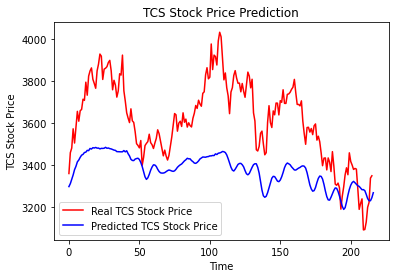

In [24]:
plt.plot(real_stock_price, color = 'red', label = 'Real TCS Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TCS Stock Price')
plt.title('TCS Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TCS Stock Price')
plt.legend()
plt.show()

## Improving the RNN

Hi guys,

here are different ways to improve the RNN model:


1. Getting more training data: we trained our model on the past 5 years of the Google Stock Price but it would be even better to train it on the past 10 years.

2. Increasing the number of timesteps: the model remembered the stock prices from the 60 previous financial days to predict the stock price of the next day. That’s because we chose a number of 60 timesteps (3 months). You could try to increase the number of timesteps, by choosing for example 120 timesteps (6 months).

3. Adding some other indicators: if you have the financial instinct that the stock price of some other companies might be correlated to the one of Google, you could add this other stock price as a new indicator in the training data.

4. Adding more LSTM layers: we built a RNN with four LSTM layers but you could try with even more.

5. Adding more neurones in the LSTM layers: we highlighted the fact that we needed a high number of neurones in the LSTM layers to respond better to the complexity of the problem and we chose to include 50 neurones in each of our 4 LSTM layers. You could try an architecture with even more neurones in each of the 4 (or more) LSTM layers.

Enjoy Deep Learning!